<a href="https://colab.research.google.com/github/abhishekdconviction/100-Days-Of-ML-Code/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving summer2016.csv to summer2016.csv
Saving medals_by_country_2016.csv to medals_by_country_2016.csv
Saving climate_change.csv to climate_change.csv
Saving austin_weather.csv to austin_weather.csv
Saving seattle_weather.csv to seattle_weather.csv


In [ ]:
austin_weather = pd.read_csv("austin_weather.csv")
seattle_weather = pd.read_csv("seattle_weather.csv")

In [ ]:
#austin_weather.info()
pd.set_option('max_columns', None)
austin_weather.head()
austin_weather.columns
austin_weather = austin_weather.loc[:,['STATION', 'NAME', 'DATE','MLY-PRCP-25PCTL',
       'MLY-PRCP-50PCTL', 'MLY-PRCP-75PCTL']]
#austin_weather.head()


In [ ]:
seattle_weather = seattle_weather.loc[:,['STATION', 'NAME', 'DATE','MLY-SNOW-25PCTL',
       'MLY-SNOW-50PCTL', 'MLY-SNOW-75PCTL']]
#sseattle_weather.info()
seattle_avg_snowfall = seattle_weather.groupby('DATE')['MLY-SNOW-25PCTL','MLY-SNOW-50PCTL','MLY-SNOW-75PCTL'].mean()
#seattle_avg_snowfall

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, ' Austin Weather')

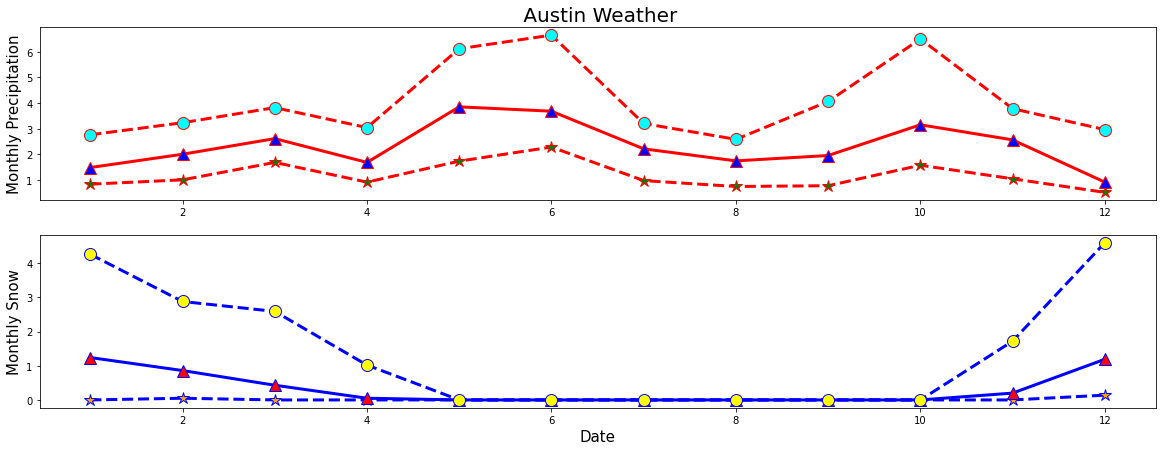

In [ ]:
#plot
mpl.rcParams['figure.figsize'] = (20,7)
fig, (ax1,ax2) = plt.subplots(2,1)
X = austin_weather['DATE']
Y = austin_weather['MLY-PRCP-25PCTL']
Y1 = austin_weather['MLY-PRCP-50PCTL']
Y2 = austin_weather['MLY-PRCP-75PCTL']
X2 = seattle_avg_snowfall.index
Y3 = seattle_avg_snowfall['MLY-SNOW-25PCTL']
Y4 = seattle_avg_snowfall['MLY-SNOW-50PCTL']
Y5 = seattle_avg_snowfall['MLY-SNOW-75PCTL']
ax1.plot(X,Y, color="red", marker="*",markersize =12, markerfacecolor ="green", linewidth=3, linestyle ="--")
ax1.plot(X,Y1, color="red", marker="^",markersize =12, markerfacecolor ="blue", linewidth=3)
ax1.plot(X,Y2, color="red", marker="o",markersize =12, markerfacecolor ="cyan", linewidth=3, linestyle ="--")
ax2.plot(X2,Y3, color="blue", marker="*",markersize =12, markerfacecolor ="orange", linewidth=3, linestyle ="--")
ax2.plot(X2,Y4, color="blue", marker="^",markersize =12, markerfacecolor ="red", linewidth=3)
ax2.plot(X2,Y5, color="blue", marker="o",markersize =12, markerfacecolor ="yellow", linewidth=3, linestyle ="--")
ax2.set_xlabel("Date", size=15)
ax1.set_ylabel("Monthly Precipitation", size=15)
ax2.set_ylabel("Monthly Snow", size=15)
ax1.set_title(" Austin Weather", size=20)

In [ ]:
from matplotlib import rcParams
#rcParams

In [ ]:
medals = pd.read_csv("medals_by_country_2016.csv")
climate_change = pd.read_csv('climate_change.csv')
summers = pd.read_csv('summer2016.csv')


In [ ]:
medals = medals.loc[:,~medals.columns.str.contains('unnamed', case=False)]
summers = summers.loc[:,~summers.columns.str.contains('unnamed', case=False)]
climate_change['date'] = pd.to_datetime(climate_change['date'])
climate_change.info(), summers.info()

NameError: ignored

In [ ]:
summers.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [ ]:
summers.drop(['Year', 'Games','City','Season','ID'], axis = 1,inplace= True)


In [ ]:
summers.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Sport,Event,Medal
0,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,Rowing,Rowing Men's Coxless Pairs,Bronze
1,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,Luc Abalo,M,31.0,182.0,86.0,France,FRA,Handball,Handball Men's Handball,Silver
3,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [ ]:
pd.set_option('display.max_rows',500)
medal_count = summers.groupby('Team')['Medal'].count().sort_values( ascending = False)
medal_count = pd.DataFrame(medal_count)
medal_count.columns
medal_count.head()

,Medal
Team,
United States,255
Germany,157
Great Britain,143
Russia,113
China,109


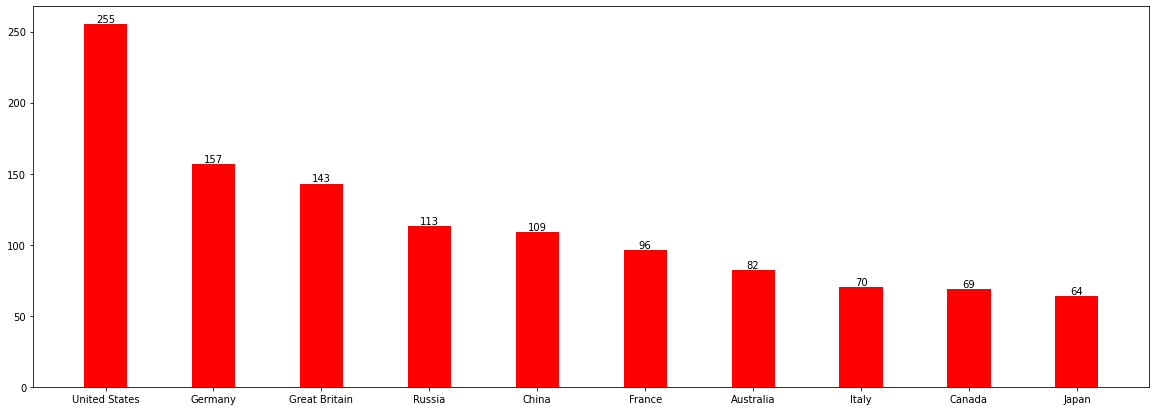

In [ ]:
#plotting medal count by top 10 countries
fig,ax = plt.subplots()
X = medal_count.index[:10]
Y = medal_count['Medal'][:10]
ax.bar(X,Y, 0.4, color ='red')
for i in range(len(X)):
  ax.annotate(str(Y[i]), xy = (X[i],Y[i]),ha='center', va='bottom')

In [ ]:
#plotting medal counts for gold. sliver and bronze for top 10 countries
medal_gold = summers[summers['Medal']=='Gold']
medal_silver = summers[summers['Medal']=='Silver']
medal_bronze = summers[summers['Medal']=='Bronze']
gold_count = pd.DataFrame(medal_gold.groupby('Team')['Medal'].count().sort_values(ascending= False))
silver_count = pd.DataFrame(medal_silver.groupby('Team')['Medal'].count().sort_values(ascending= False))
bronze_count = pd.DataFrame(medal_bronze.groupby('Team')['Medal'].count().sort_values(ascending= False))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


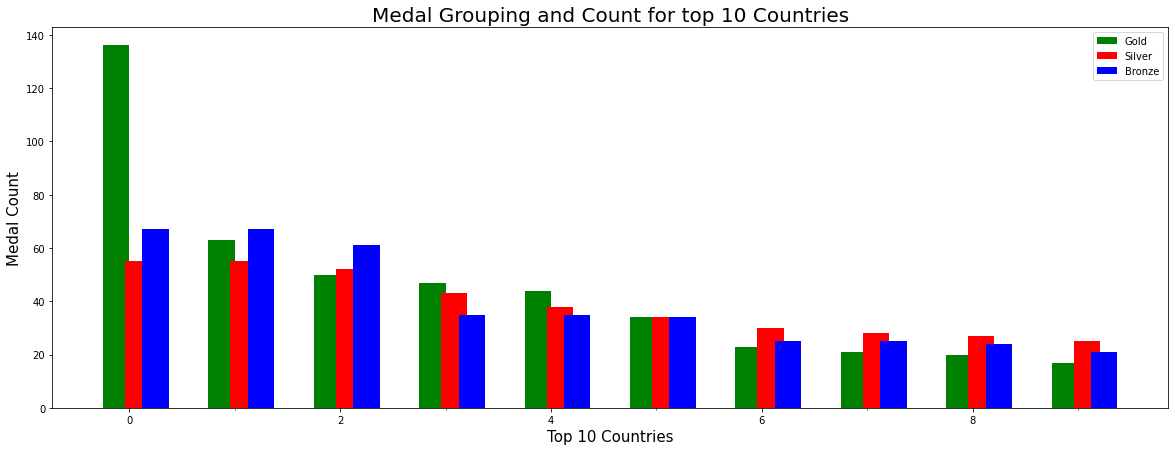

In [ ]:
#plotting group bar graphs for top 10 countries

X1 = list(gold_count.index[:10])
Y1 = gold_count['Medal'][:10]
Y2 = silver_count['Medal'][:10]
Y3 = bronze_count['Medal'][:10]
p = np.arange(len(X1))
width = 0.5
fig, ax = plt.subplots()
g =ax.bar(p-width/4,Y1,width/2,label="Gold", color="green")
s =ax.bar(p+width/6,Y2,width/2,label="Silver", color="red")
b =ax.bar(p+width/2,Y3,width/2,label="Bronze", color="blue")
ax.set_ylabel("Medal Count", size=15)
ax.set_xlabel("Top 10 Countries", size=15)
ax.set_title("Medal Grouping and Count for top 10 Countries", size =20)
ax.set_xticks(p,X1)
ax.legend()


#Plotting timeseries data

#multiple axes in the plot

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
#upload cliamte change data
uploaded = files.upload()

Saving summer2016.csv to summer2016.csv
Saving medals_by_country_2016.csv to medals_by_country_2016.csv
Saving climate_change.csv to climate_change.csv
Saving austin_weather.csv to austin_weather.csv
Saving seattle_weather.csv to seattle_weather.csv


In [5]:
climate_change = pd.read_csv('climate_change.csv', parse_dates= ['date'])
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           706 non-null    datetime64[ns]
 1   co2            699 non-null    float64       
 2   relative_temp  706 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.7 KB


In [6]:
#random experiment with changing the 
climate_change['co2'].isna()
co2_avg = climate_change['co2'].agg('mean')
co2_nan = climate_change['co2'].loc[climate_change['co2'].isna()]
type(co2_nan.index)
for i in co2_nan.index:
  co2_nan[i] = co2_avg
co2_nan

3      352.316481
7      352.316481
71     352.316481
72     352.316481
73     352.316481
213    352.316481
313    352.316481
Name: co2, dtype: float64

In [7]:
#climate_change['co2'] = climate_change['co2'].fillna(method="bfill")
climate_change['co2'] = climate_change['co2'].fillna(value = co2_avg)
climate_change['year'] = climate_change['date'].dt.year
climate_change.info()
climate_change.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           706 non-null    datetime64[ns]
 1   co2            706 non-null    float64       
 2   relative_temp  706 non-null    float64       
 3   year           706 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 22.2 KB


,date,co2,relative_temp,year
0,1958-03-06,315.710000,0.10,1958
1,1958-04-06,317.450000,0.01,1958
2,1958-05-06,317.500000,0.08,1958
3,1958-06-06,352.316481,-0.05,1958
4,1958-07-06,315.860000,0.06,1958


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Annual Climate Change Metrics')

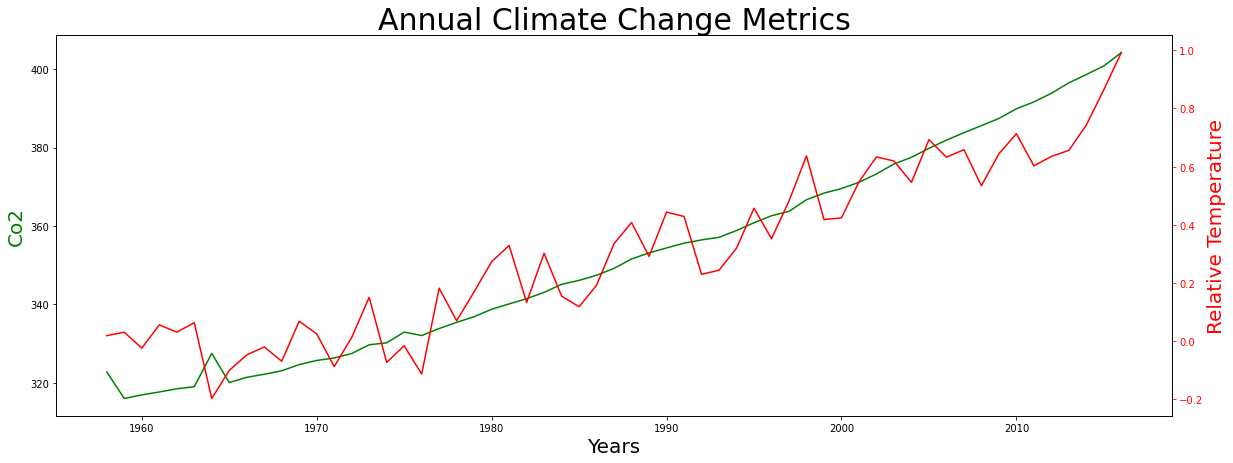

In [8]:
climate_change_yearly = climate_change.groupby('year')['co2','relative_temp'].mean()
#climate_change_yearly.info()
climate_change_yearly.head()
#plotting
import matplotlib as mpl
from matplotlib import rcParams
rcParams['figure.figsize'] = (20,7)
fig, ax = plt.subplots()
X = climate_change_yearly.index
Y= climate_change_yearly['co2']
Y2= climate_change_yearly['relative_temp']
ax.plot(X,Y, color ="green")
ax2= ax.twinx()
ax2.plot(X,Y2, color="red")
ax.set_xlabel("Years", size = 20)
ax.set_ylabel("Co2", size = 20, color='green')
ax2.set_ylabel("Relative Temperature", size = 20, color="red")
ax2.tick_params('y', colors ="red")
ax.set_title('Annual Climate Change Metrics', size =30)
#for i in range(len(X)):
#  ax.annotate(str(Y[i]),xy=(X[i],Y[i]), ha="center",va="center")


Text(0.5, 1.0, 'Climate change')

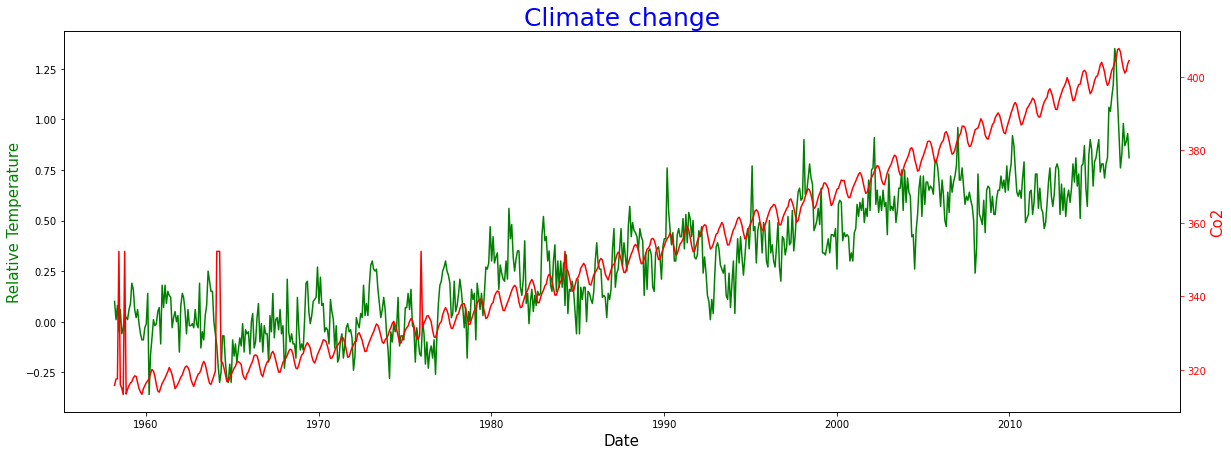

In [9]:
#plotting
import matplotlib as mpl
from matplotlib import rcParams
rcParams['figure.figsize'] = (20,7)
fig, ax = plt.subplots()
X = climate_change['date']
Y = climate_change['relative_temp']
Y1 = climate_change['co2']
ax2 = ax.twinx()
ax.plot(X,Y, color = 'green')
ax2.plot(X,Y1, color="red")
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Relative Temperature", size=15, color ="green")
ax2.set_ylabel("Co2", size =15, color= "red")
ax2.tick_params(colors="red")
ax.set_title("Climate change", size=25, color="blue")

#anotating time series plots

Text(2015-10-06 00:00:00, -0.2, '>1 degree')

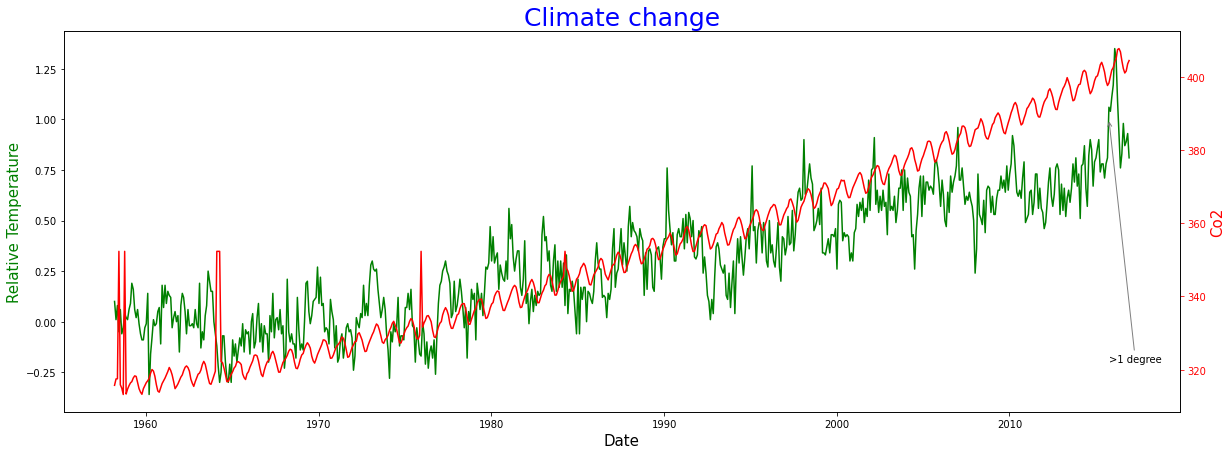

In [10]:
#plotting
import matplotlib as mpl
from matplotlib import rcParams
rcParams['figure.figsize'] = (20,7)
fig, ax = plt.subplots()
X = climate_change['date']
Y = climate_change['relative_temp']
Y1 = climate_change['co2']
ax2 = ax.twinx()
ax.plot(X,Y, color = 'green')
ax2.plot(X,Y1, color="red")
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Relative Temperature", size=15, color ="green")
ax2.set_ylabel("Co2", size =15, color= "red")
ax2.tick_params(colors="red")
ax.set_title("Climate change", size=25, color="blue")
ax.annotate('>1 degree',xy=(pd.Timestamp("2015-10-06"),1), xytext=(pd.Timestamp('2015-10-06'),-.2), arrowprops={'arrowstyle':'->', "color":"gray"})

#quantitative charts - Bar charts and Histograms

In [12]:
uploaded = files.upload()

Saving summer2016.csv to summer2016 (1).csv
Saving medals_by_country_2016.csv to medals_by_country_2016 (1).csv
Saving climate_change.csv to climate_change (1).csv
Saving austin_weather.csv to austin_weather (1).csv
Saving seattle_weather.csv to seattle_weather (1).csv


In [15]:
medals = pd.read_csv("medals_by_country_2016 (1).csv")
summers = pd.read_csv('summer2016.csv')
#medals = medals.loc[:,~medals.columns.str.contains('unnamed', case=False)]
summers = summers.loc[:,~summers.columns.str.contains('unnamed', case=False)]

In [16]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Bronze      10 non-null     int64 
 2   Gold        10 non-null     int64 
 3   Silver      10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [17]:
medals['Country']= medals.iloc[:,0]
medals = medals.loc[:,~medals.columns.str.contains('unnamed', case=False)]
medals.head()

,Bronze,Gold,Silver,Country
0,67,137,52,United States
1,67,47,43,Germany
2,26,64,55,Great Britain
3,35,50,28,Russia
4,35,44,30,China


No handles with labels found to put in legend.


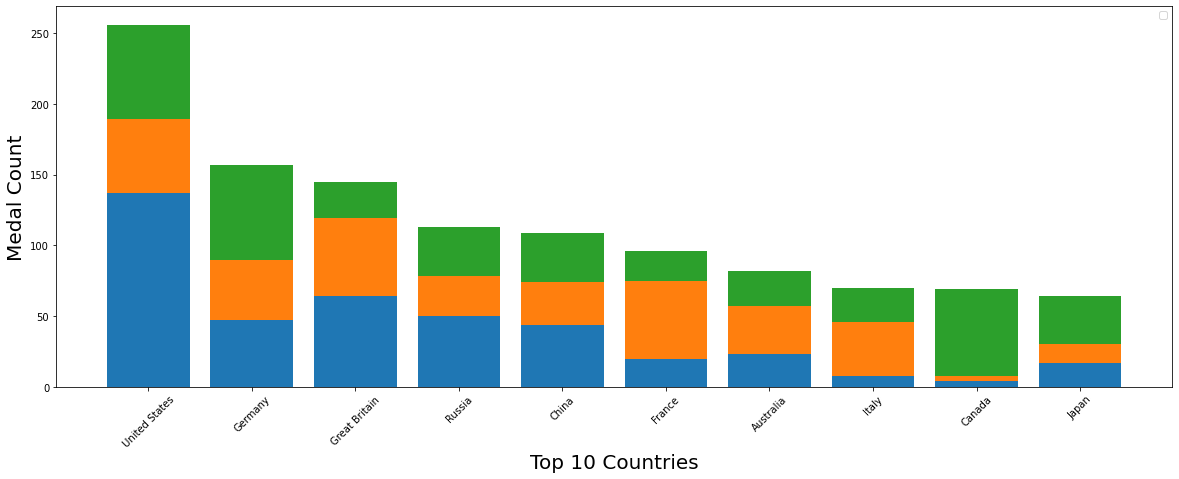

In [18]:
#plotting
fig,ax= plt.subplots()
X = medals['Country']
Y1 = medals['Gold']
Y2 = medals['Silver']
Y3 = medals['Bronze']
ax.bar(X,Y1)
ax.bar(X,Y2,bottom= Y1 )
ax.bar(X,Y3, bottom = Y1 +Y2)
ax.set_xlabel("Top 10 Countries",size =20)
ax.set_ylabel("Medal Count",size =20)
ax.set_xticklabels(X, rotation =45)
ax.legend()

In [19]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files

In [20]:
uploaded = files.upload()

Saving summer2016.csv to summer2016 (2).csv
Saving medals_by_country_2016.csv to medals_by_country_2016 (2).csv
Saving climate_change.csv to climate_change (2).csv
Saving austin_weather.csv to austin_weather (2).csv
Saving seattle_weather.csv to seattle_weather (2).csv
Saving employees.sqlite to employees.sqlite


In [21]:
summers = pd.read_csv("summer2016 (2).csv")
medals = pd.read_csv('medals_by_country_2016 (2).csv')
climate_change = pd.read_csv('climate_change (2).csv')
austin_weather = pd.read_csv('austin_weather (2).csv')
seattle_weather = pd.read_csv('seattle_weather (2).csv')

In [22]:
summers = summers.loc[:, ~summers.columns.str.contains('unnamed',case = False)]
summers.info()
summers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2014 non-null   int64  
 1   Name    2014 non-null   object 
 2   Sex     2014 non-null   object 
 3   Age     2014 non-null   float64
 4   Height  2014 non-null   float64
 5   Weight  2014 non-null   float64
 6   Team    2014 non-null   object 
 7   NOC     2014 non-null   object 
 8   Games   2014 non-null   object 
 9   Year    2014 non-null   int64  
 10  Season  2014 non-null   object 
 11  City    2014 non-null   object 
 12  Sport   2014 non-null   object 
 13  Event   2014 non-null   object 
 14  Medal   2014 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 236.1+ KB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Text(0.5, 0.98, 'Distribution of Height and Weight of Men and Women in Rowing')

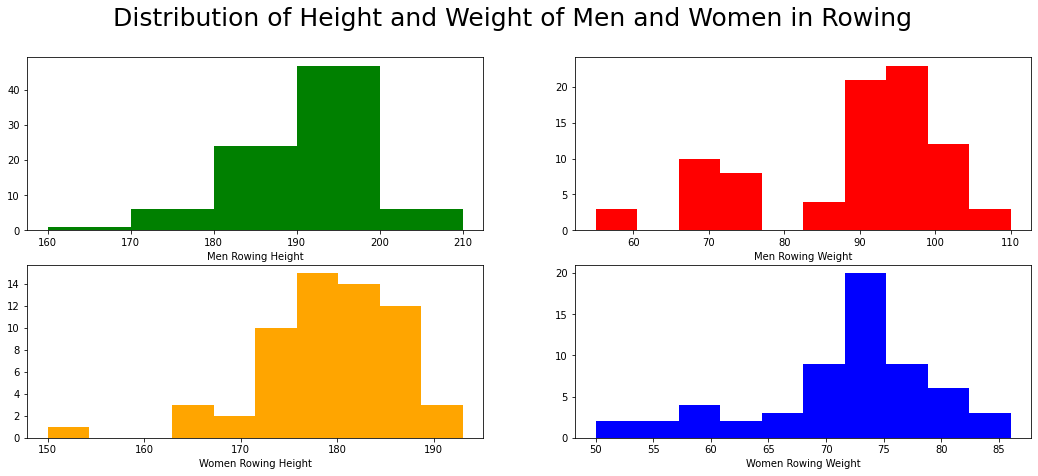

In [23]:
#mean height for rowing
mpl.rcParams['figure.figsize'] =(18,7)
fig, axs = plt.subplots(2,2)
df_rowing_men = summers[(summers['Sport']=='Rowing') & (summers['Sex']=='M')]
df_rowing_women = summers[(summers['Sport']=='Rowing') & (summers['Sex']=='F')]

X = "Height"
Y = df_rowing_men['Height']
axs[0,0].hist(Y, color ='green', bins=[160,170,180,190,200,210])
axs[0,0].set_xlabel("Men Rowing Height")
Y1 = df_rowing_men['Weight']
X1 ="Weight"
#ax2=ax.twinx()
axs[0,1].hist(Y1,color='red')
#ax.set_xlabel("Rowing Men", size = 20)
axs[0,1].set_xlabel("Men Rowing Weight")

#X2 = "Height"
Y2 = df_rowing_women['Height']
axs[1,0].hist(Y2, color ='orange')
axs[1,0].set_xlabel("Women Rowing Height")

Y3 = df_rowing_women['Weight']
X3 ="Weight"
#ax2=ax.twinx()
axs[1,1].hist(Y3,color='blue')
axs[1,1].set_xlabel("Women Rowing Weight")
fig.suptitle("Distribution of Height and Weight of Men and Women in Rowing", size = 25)

#ax.set_xlabel("Rowing Men", size = 20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Weight (kg)')

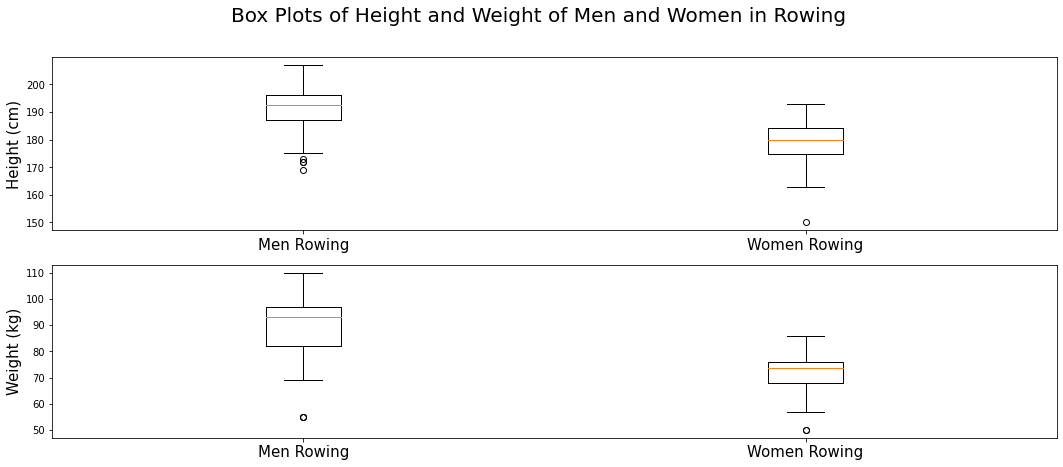

In [24]:
#boxplots

fig, (ax1,ax2) = plt.subplots(2,1)
fig.suptitle("Box Plots of Height and Weight of Men and Women in Rowing", size =20)
ax1.boxplot([Y,Y2])
ax1.set_xticklabels(['Men Rowing','Women Rowing'], size =15)
ax1.set_ylabel("Height (cm)", size = 15)
ax2.boxplot([Y1,Y3])
ax2.set_xticklabels(['Men Rowing','Women Rowing'], size =15)
ax2.set_ylabel("Weight (kg)", size = 15)

In [25]:
climate_change['date'] = pd.to_datetime(climate_change['date'])
climate_change.set_index('date',drop=True, inplace= True)

ggplot
bmh
default
seaborn
fivethirtyeight
seaborn-bright


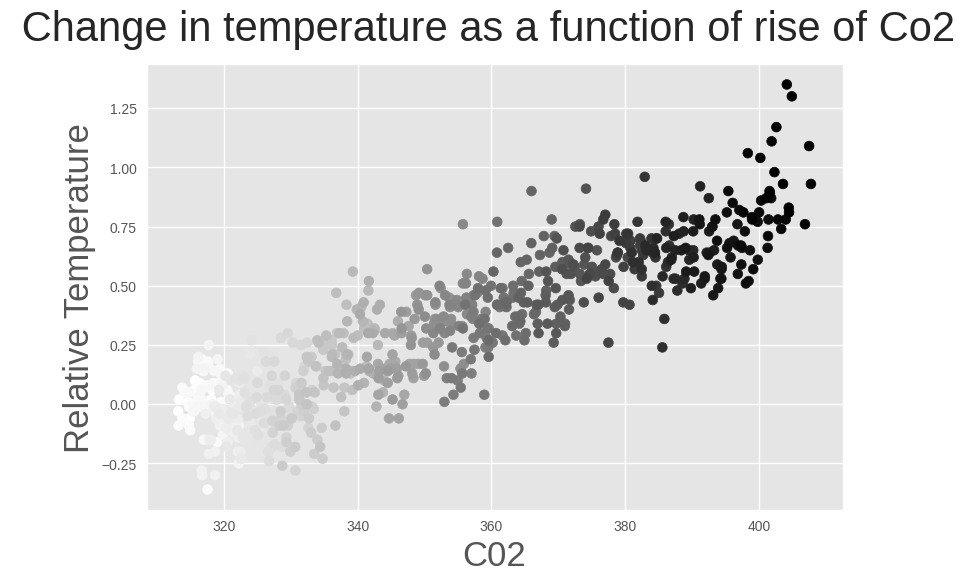

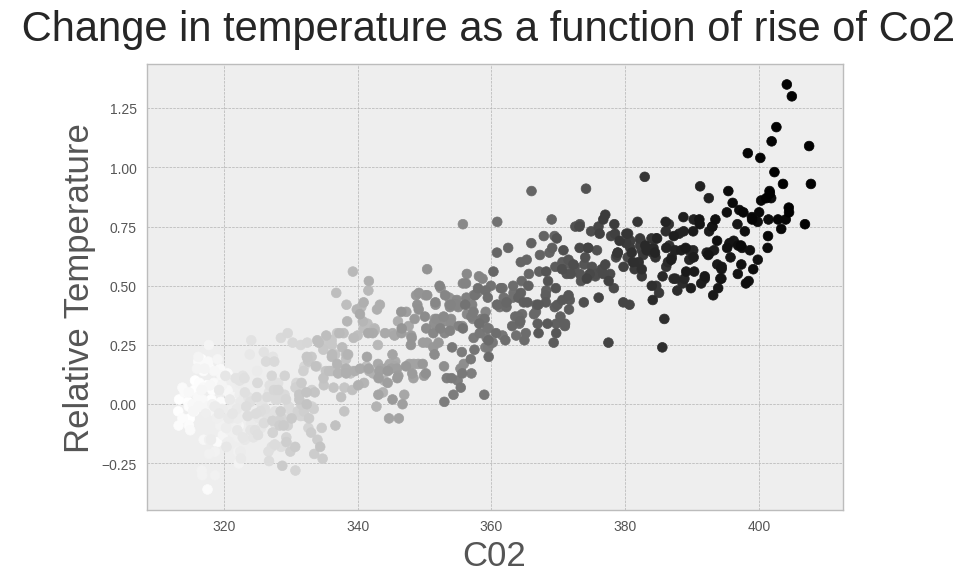

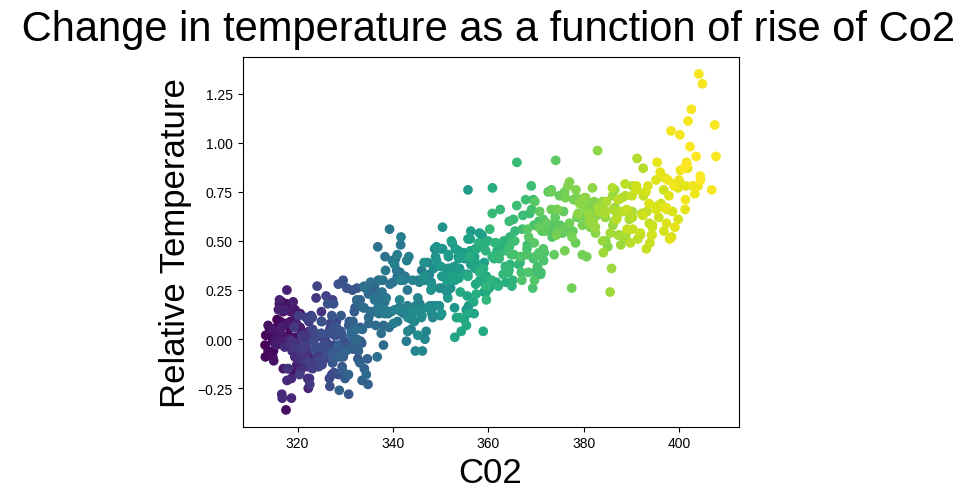

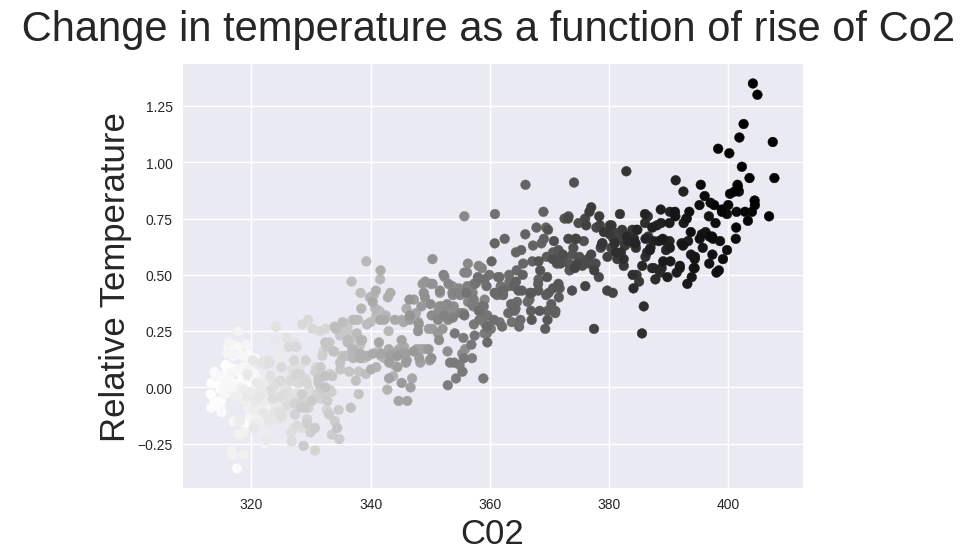

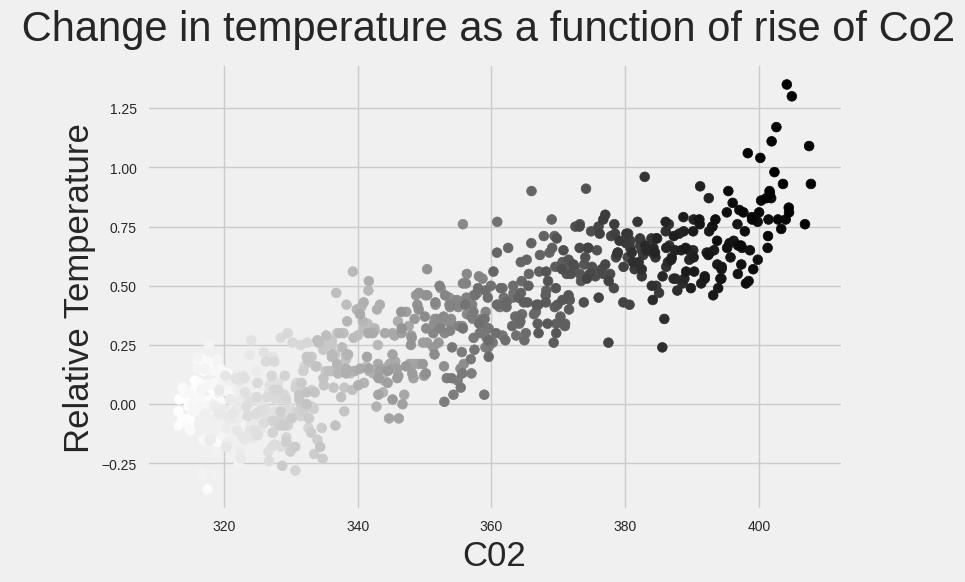

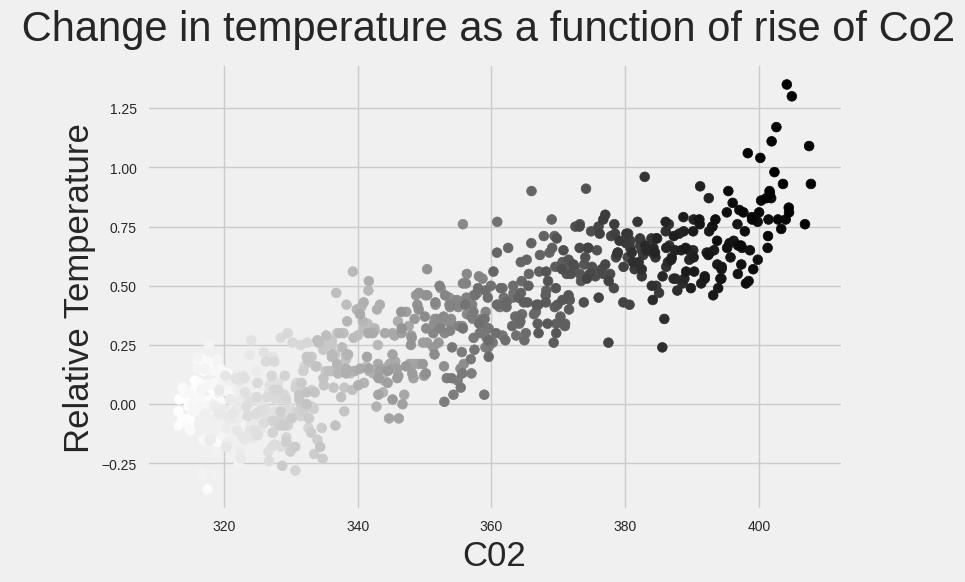

In [40]:
#scatter plots
styles =['ggplot','bmh','default','seaborn','fivethirtyeight', 'seaborn-bright']
for style in styles:
  print(style)
  plt.style.use(style)
  fig,ax = plt.subplots()
  fig.suptitle(" Change in temperature as a function of rise of Co2", size =30)
  ax.scatter(climate_change['co2'],climate_change['relative_temp'], c= climate_change.index)
  ax.set_xlabel("C02", size = 25)
  ax.set_ylabel("Relative Temperature", size = 25)
  fig.savefig('climate_change'+style+'.png')